<a href="https://colab.research.google.com/github/670510772/229351-Statlearningfordatasci1/blob/main/Lab04_670510772.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


In [5]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [7]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [8]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

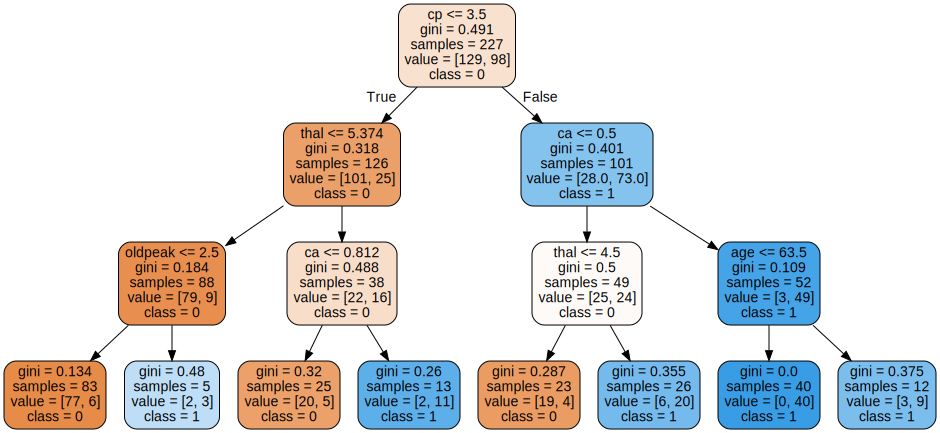

In [9]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [10]:
from sklearn.metrics import classification_report
ypred = gridcv.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        35
           1       0.84      0.76      0.79        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [13]:
clf = DecisionTreeClassifier()
bagged_trees = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)
bagged_trees.fit(X_train, y_train)
ypred_bt = bagged_trees.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.88      0.71      0.78        41

    accuracy                           0.79        76
   macro avg       0.80      0.80      0.79        76
weighted avg       0.81      0.79      0.79        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [14]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

1.Study the hyperparameters of three models: Decision tree, Bagged Decision Trees and Random Forest

In [16]:
params = {'max_depth': [3, 6, 9, 12, 15, 18, 20 ]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12, 15, 18, 20]},
             scoring='accuracy')

In [17]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [18]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)

In [19]:
from sklearn.metrics import classification_report
ypred = gridcv.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        35
           1       0.84      0.76      0.79        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [20]:
clf = DecisionTreeClassifier()
bagged_trees = BaggingClassifier(clf, n_estimators=500, max_samples=X_train.shape[0], max_features=5)
bagged_trees.fit(X_train, y_train)
ypred_bt = bagged_trees.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.86      0.73      0.79        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76



In [21]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

2.For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
- Decision tree: choose at least 3 hyperparameters
- Bagged decision trees: choose at least 3 hyperparameters
- Random forest: choose at least 3 hyperparameters

In [29]:
params = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 7, 10],'min_samples_split': [2, 5, 10]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [30]:
from sklearn.metrics import classification_report
ypred = gridcv.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        35
           1       0.76      0.71      0.73        41

    accuracy                           0.72        76
   macro avg       0.72      0.73      0.72        76
weighted avg       0.73      0.72      0.72        76



In [31]:
clf = DecisionTreeClassifier()
dt_params = {'n_estimators': [100, 300, 500],'max_samples': [0.5, 0.8, 1.0],'max_features': [5, 8, 13]
}
bagged_trees = BaggingClassifier(clf, n_estimators=500, max_samples=X_train.shape[0], max_features=5)
bagged_trees.fit(X_train, y_train)
ypred_bt = bagged_trees.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.85      0.71      0.77        41

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.78      0.78        76



In [45]:
rf = RandomForestClassifier(n_estimators=200,random_state=40)
rf.fit(X_train, y_train)
ypred_train = rf.predict(X_train)
print(classification_report(y_train, ypred_train))
#rf.score(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        98

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



3. For each model, compute the f1_macro and accuracy score on the test set.
- What is your best model?
- Plot the best tree model
- What hyperparameters did you choose? (explain in words, not in sklearn's parameter name)
- What are the best values of your hyperparameters?

Random forest

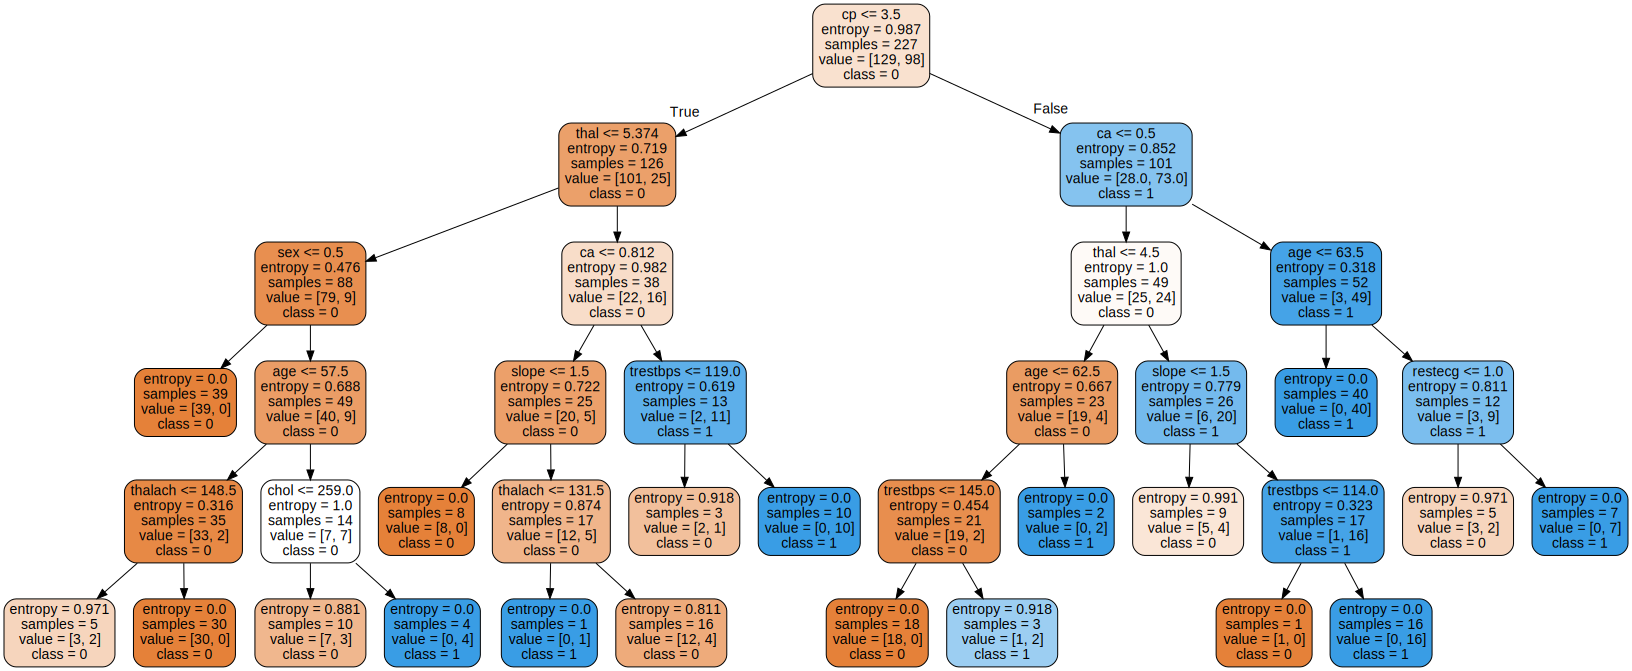

In [46]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

เนื่องจาก Random Forest มีการสร้างต้นไม้หลายต้นขึ้นมาทำงานร่วมกันทำให้ผลลัพธ์มีความเสถียร